In [63]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr
from sklearn.preprocessing import scale


                var1      var2      var3      var4
2020-01-01  5.666037 -3.015323 -1.267180  0.027103
2020-02-01 -1.000241 -0.750473 -1.978336 -1.942217
2020-03-01 -0.399359 -0.260040 -0.010337 -1.003518
2020-04-01 -3.113674  1.688289 -2.259945  0.667824
2020-05-01 -0.466242 -2.053474  0.246790 -4.138155


<Axes: >

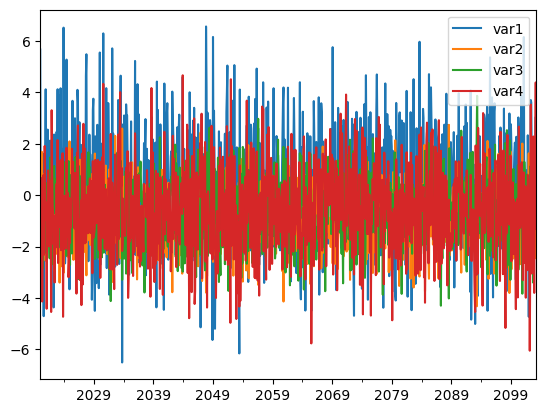

In [ ]:


# --- Parameters & RNG ---
rng = np.random.default_rng(123)   # reproducible seed
n = 1000                           # number of time points
p = 4                              # number of variables

# random means between -1 and 1
mu = rng.uniform(-1.0, 1.0, size=p)

# make a random SPD covariance: Sigma = A^T A
A = rng.standard_normal((p, p))
Sigma = A.T @ A                    # positive definite covariance

# draw multivariate normal samples
data = rng.multivariate_normal(mean=mu, cov=Sigma, size=n)   # shape (n, p)

# make a "time series" with monthly index starting Jan 2020 (like R ts(..., freq=12))
idx = pd.date_range(start="2020-01-01", periods=n, freq="MS")  # monthly start
ts_data = pd.DataFrame(data, index=idx, columns=[f"var{i+1}" for i in range(p)])

# view first few rows
print(ts_data.head())

ts_data.plot()

In [53]:



# number of stocks
r = 100 

# number of sectors
q = 8


# load SP500 stock prices_test into an xts table
result= pyreadr.read_r("examples/stocks/sp500-data-2016-2020.rds")
stock_prices_orig = result[None] 
stock_prices = stock_prices_orig.iloc[0:1000, 0:r]
winLen =  200
Nday = stock_prices.count()


Nwin = Nday / winLen  


In [52]:
log_prices = np.log(stock_prices)
log_returns = log_prices.diff().iloc[1:]
log_returns

,A,AAL,ABBV,ABC,ABMD,ABT,ADM,AEE,AEP,AES,...,DE,DFS,DGX,DHR,DLR,DOV,DRE,DTE,DUK,DVA
1,-0.003447,-0.009579,-0.004175,0.014520,-0.002820,-0.000233,0.011099,0.011783,0.008195,0.013691,...,0.005766,-0.002279,0.000282,0.001852,0.001180,-0.019164,0.013302,0.010183,0.007138,0.006532
2,0.004429,0.017370,0.000174,-0.015404,0.003523,-0.008423,-0.024582,0.006410,0.003734,-0.035128,...,-0.011302,-0.019780,-0.015663,-0.011718,0.009264,-0.021395,-0.014259,-0.004513,0.002229,-0.013986
3,-0.043403,-0.019100,-0.002967,-0.032453,-0.040431,-0.024258,-0.024042,0.000684,-0.011587,-0.025235,...,-0.008895,-0.018795,-0.022202,-0.026002,-0.002861,-0.014465,-0.028650,-0.010991,-0.009227,-0.007954
4,-0.010568,-0.001980,-0.027646,-0.005801,0.031955,-0.021166,-0.003773,-0.007784,-0.001544,0.014341,...,-0.016538,-0.012529,-0.005178,0.000565,0.003381,-0.008607,-0.021410,-0.004328,-0.002250,0.000739
5,-0.016987,0.017434,-0.032323,-0.040627,0.004953,0.001474,-0.006711,0.000230,0.008716,-0.011013,...,0.005273,0.010353,0.007683,-0.000565,0.020047,-0.015156,0.008020,0.009776,0.011059,-0.006523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.008801,0.015885,0.017939,0.012997,-0.030938,0.000579,0.017109,0.009816,0.010590,0.023506,...,0.002027,-0.006365,0.009273,0.019470,0.015533,-0.004586,0.006701,0.020766,0.004319,-0.003168
996,-0.005938,0.012812,0.007242,-0.033236,0.014751,0.007610,0.004990,-0.001982,0.002040,-0.023506,...,0.005711,0.004402,0.005354,-0.004434,-0.014653,0.009939,-0.011095,0.009291,0.000663,-0.012495
997,-0.006213,-0.009950,-0.008361,0.004799,-0.010788,-0.001494,-0.019668,0.005539,0.005669,0.013127,...,-0.007101,0.000000,0.004300,-0.005053,0.022674,-0.005793,0.004102,0.004884,0.000662,0.025789
998,0.012862,0.019452,-0.006289,0.002988,-0.043766,0.004820,0.007257,-0.007658,0.002344,0.019629,...,0.000869,-0.002199,0.007249,0.002862,0.021919,-0.001145,0.002336,0.002780,-0.007311,0.004076


In [62]:
# read the CSV
SP500 = pd.read_csv("examples/stocks/SP500-sectors.csv")
symbols = stock_prices.columns[:r]
stock_sectors = SP500.loc[SP500['Symbol'].isin(symbols), 'GICS.Sector']

stock_sectors_return = pd.Categorical(stock_sectors).codes



In [ ]:
## Online TV graph learning (proposed)
forget_fac = 0.1
data_frame = log_returns[1:winLen,]
S_cov = np.corrcoef(scale(data_frame))
w = W_init('naive', MASS::ginv(S_cov))
w0 = w
A0 = A(w)
A0 = A0 / rowSums(A0)
w0 = Ainv(A0)
w0 = w0/sum(w0)

w_lagged = w0

w_lagged = 0



SyntaxError: invalid syntax (4078745496.py, line 5)

In [172]:
ts_data_corr = np.corrcoef(ts_data.T)
Sinv = np.linalg.pinv(ts_data_corr)
print(Sinv)

[[ 2.92120101  2.42314859  0.96414716 -1.76962627]
 [ 2.42314859  3.64960084  1.7542963  -1.67271746]
 [ 0.96414716  1.7542963   1.93749266 -0.44328618]
 [-1.76962627 -1.67271746 -0.44328618  2.1611666 ]]


In [ ]:
def Linv(M):
    """
    From Laplacian/precision matrix M to vector of edge weights.
    Assumes M is symmetric.
    Edge weight between i and j is -M[i,j] for i<j.
    Loop-based implementation matching np.tril_indices order.
    """
    M = np.asarray(M)
    if M.shape[0] != M.shape[1]:
        raise ValueError("M must be square")

    n = M.shape[0]
    w = np.empty(n * (n - 1) // 2, dtype=M.dtype)  # preallocate
    k = 0
    for i in range(1, n):       # rows (strict lower: start at 1)
        for j in range(i):      # cols 0..i-1
            w[k] = -M[i, j]
            k += 1
    return w

def W_init(M):
    W0 = Linv(M)
    W0[W0 < 0] = 0
    return W0

In [ ]:


w =  W_init(Sinv)
print("w")
print(w)

w
[0.         0.         0.         1.76962627 1.67271746 0.44328618]


In [216]:
def A_operator(w, p):

    w = np.asarray(w)


    Aw = np.zeros((p,p))

    for i in range(1,p+1):

        for j in range(1,p+1):

            
            if (i > j):              
                dj = int( -j + ((j - 1)/2)*(2*p - j) ) 
                Aw[ i-1,  j-1] = -w[i + dj - 1]
                Aw[ j-1,  i-1] = Aw[ i-1, j-1]



    return Aw

print("Aw")
Aw = A_operator(w,p)
print(Aw)

Aw
[[ 0.         -0.         -0.         -0.        ]
 [-0.          0.         -1.76962627 -1.67271746]
 [-0.         -1.76962627  0.         -0.44328618]
 [-0.         -1.67271746 -0.44328618  0.        ]]


In [ ]:
def A_star(Y,p):

    Y = np.asarray(Y)
    if Y.ndim != 2 or Y.shape[0] != Y.shape[1]:
        raise ValueError("Y must be a square matrix.")

    Astar = np.zeros(int(p*(p-1)/2))

    for i in range(1,p+1):

        for j in range(1,p+1):
           
            if (i > j):
                k = int( (i - j) + ((j - 1)/2)*(2*p - j) ) 
                Astar[k-1] = Y[i-1, j-1] + Y[ j-1, i-1]


    return Astar

Astar = A_star(Aw,p)
print("A*")
print(Astar) 

L*
[-0.         -0.         -0.         -3.53925254 -3.34543493 -0.88657236]


In [231]:
def L_operator(w, p):

    w = np.asarray(w)


    Lw = np.zeros((p,p))

    for i in range(1,p+1):

        for j in range(1,p+1):

            
            if (i > j):              
                dj = int( -j + ((j - 1)/2)*(2*p - j) ) 
                Lw[ i-1,  j-1] = -w[i + dj - 1]
                Lw[ j-1,  i-1] = Lw[ i-1, j-1]

    Lw[np.diag_indices(p)] = -Lw.sum(axis=1)

    return Lw


print("Lw")
Lw = L_operator(w,p)
print(Lw)

Lw
[[-0.         -0.         -0.         -0.        ]
 [-0.          3.44234373 -1.76962627 -1.67271746]
 [-0.         -1.76962627  2.21291245 -0.44328618]
 [-0.         -1.67271746 -0.44328618  2.11600364]]


In [214]:
def L_star(Y,p):

    Y = np.asarray(Y)
    if Y.ndim != 2 or Y.shape[0] != Y.shape[1]:
        raise ValueError("Y must be a square matrix.")

    Ystar = np.zeros(int(p*(p-1)/2))

    for i in range(1,p+1):

        for j in range(1,p+1):
           
            if (i > j):
                k = int( (i - j) + ((j - 1)/2)*(2*p - j) ) 
                Ystar[k-1] = Y[i-1,i-1] - Y[i-1, j-1] - Y[ j-1, i-1] + Y[ j-1, j-1]


    return Ystar

Lstar = L_star(Lw,p)
print("L*")
print(Lstar) 

L*
[3.44234373 2.21291245 2.11600364 9.19450872 8.90378231 5.21548845]


In [ ]:

#Lw = [[20.76359,  0.000000, -20.763591,   0.00000],
#      [ 0.00000,  7.224546,  -7.224546,   0.00000],
#      [-20.76359, -7.224546,  44.960126, -16.97199],
#      [0.00000,  0.000000, -16.971989,  16.97199]]


In [237]:
def D_star(Y):

    Y = np.asarray(Y)
    if Y.ndim != 2 or Y.shape[0] != Y.shape[1]:
        raise ValueError("Y must be a square matrix.")
    
    Y = np.diag(np.diag(Y))

    Ystar = np.zeros(int(p*(p-1)/2))
    for i in range(1,p+1):

        for j in range(1,p+1):
           
            if (i > j):
                k = int( (i - j) + ((j - 1)/2)*(2*p - j) ) 
                Ystar[k-1] = Y[i-1,i-1] + Y[ j-1, j-1]
    
    return Ystar

Dstar = D_star(Lw)
print(Dstar)

[27.988136 65.723716 37.73558  52.184672 24.196536 61.932116]


In [246]:
def L_update( wn, Phi_n, rho, p, k):

    ''' 
    L_n: Laplace Matrix (Ln = Diag(Wn1) - Wn = Lwn) Laplacian operator “A Unified Framework for Structured Graph Learning via Spectral Constraints”
    Phi_n: ADMM Dual Variable 
    rho: ADMM Hyperparameter
    p: Number of time series
    k: Clusters
    '''
    # Reference: Equation 16
    
    A = L_operator(wn,p) + Phi_n/rho

    eigVals,eigVecs = np.linalg.eigh(A)
    U = eigVecs[:,p-k:]
    R = np.diag(eigVals[p-k:])
    I = np.eye(R.shape[0]) 
    Ln = 0.5 * U @ ( R + np.sqrt(  R**2 + 4/rho * I  ) ) @ U.T
    return Ln

Phi_n = np.zeros((p,p)) # ADMM dual variable
rho = 1                 # ADMM hyperparameter.
k = 1                   # Clusters


Ln = L_update( w, Phi_n, rho, p, k)
print(Ln)

[[ 0.          0.          0.          0.        ]
 [ 0.          3.56488222 -1.88371095 -1.68117127]
 [ 0.         -1.88371095  0.99536723  0.88834372]
 [ 0.         -1.68117127  0.88834372  0.79282755]]


In [40]:
import numpy as np

X = np.random.rand(100, 5)

B = []
for i in range(len(X)):
    outer = np.outer(X[i, :], X[i, :])   # p x p matrix
    B.append(outer)

B = np.array(B)   # shape (100, 5, 5)
B.shape

(100, 5, 5)

In [ ]:
def w_update( x, beta, rho, a, w_n_prev, w_n, L_n, Vn, p, k, d, Tn, nu, eta, Phi_n, mu_n, z_n):

    ''' 
    x: observation for each time series
    p: Number of Time Series
    a: VAR coefficients
    k: Number of Clusters
    nu: Student T degrees of freedom
    Vn: Laplacian spectral constraint
    Tn: Number of observations in a Frame 
    eta: regularization term
    d: Node degree constraint

    Phi_n: ADMM dual variable
    mu_n: ADMM dual variable
    z_n: ADMM dual variable
    '''

    assert Vn.shape[0] == p and Vn.shape[1] == k

    L_star = L_operator( w_n, to="vector", atol=1e-12) 
    d_star = d_operator( L_star, to="vector")

    u_n = w_n - a * w_n_prev # Vector Autoregressive variable

    cth = np.sqrt( (2*beta)/(rho*(4*rho -1)) ) * np.ones(len(w_n))

    S_sum = 0
    for i in range(0,Tn):
        S_sum += ( x[i,:]*x[i,:].T )/( x[i,:].T @ L_n @ x[i,:] + nu )

    S = ( (p + nu)/Tn ) * S_sum

    aw = L_star @ ( S + Phi_n + rho*(L_star - L_n) + eta * Vn@Vn.T )

    bw = -mu_n - rho*( u_n + a*w_n_prev ) + d_star @ ( z_n - rho * ( d - d_star*w_n ) )

    cw = (1 - (rho)/(rho*(4*p-1))) * wn - (1)/( rho*(4*p -1) ) * (aw + bw)

    wn = (cw > cth) * cw

    return wn

In [8]:
nu = 1
Tn = 200
d = 10

X = np.random.rand(d,Tn)
Ln = np.random.rand(d,d)

S_sum = 0
for i in range(0,Tn):
    S_sum += ( X[i,:]@X[i,:].T )/( X[i,:].T @ Ln @ X[i,:] + nu )

print(S_sum)

S = ( (d+nu)/Tn ) * S_sum

print(S)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 200)

In [253]:
print( X[i,:]@X[i,:].T )

print( X[i,:].T @ Ln @ X[i,:] + nu )

4.121351024182732
15.747292838823615


In [10]:
S_sum = np.zeros((d, d))
for i in range(Tn):
    x = X[:,i]
    S_sum += np.outer(x, x) / (x @ Ln @ x + nu)

S = ((d + nu) / Tn) * S_sum
print(S)

[[0.24495397 0.16872517 0.19562979 0.16235252 0.18794453 0.18942221
  0.1717563  0.16334343 0.17346331 0.19131504]
 [0.16872517 0.22483012 0.18929661 0.15028682 0.1829441  0.17909404
  0.16677647 0.16866699 0.16618577 0.1778216 ]
 [0.19562979 0.18929661 0.28654661 0.18443716 0.20321104 0.20040975
  0.19244933 0.1925025  0.19735753 0.20919145]
 [0.16235252 0.15028682 0.18443716 0.23035228 0.1806759  0.18078104
  0.16783588 0.16286199 0.16189364 0.18336204]
 [0.18794453 0.1829441  0.20321104 0.1806759  0.27629795 0.19837688
  0.19222109 0.19472474 0.18444039 0.19797844]
 [0.18942221 0.17909404 0.20040975 0.18078104 0.19837688 0.26497491
  0.18085975 0.17963948 0.17851535 0.20611202]
 [0.1717563  0.16677647 0.19244933 0.16783588 0.19222109 0.18085975
  0.24400111 0.18425674 0.16409619 0.2001115 ]
 [0.16334343 0.16866699 0.1925025  0.16286199 0.19472474 0.17963948
  0.18425674 0.24820338 0.17209727 0.18118066]
 [0.17346331 0.16618577 0.19735753 0.16189364 0.18444039 0.17851535
  0.16409619